In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import seaborn as sns

In [4]:
df = pd.read_csv('D:\\GitHub\\regression\\Life_Expectancy_Data.csv'
                )
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [17]:
df['Country'].nunique()

193

In [18]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [77]:
DF = df[df['Country'].isin(['France','Italy','Germany', 'Portugal', 'Spain'])].copy()
DF


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
930,France,2015,Developing,82.4,78.0,2,NaN,0.000000,86.0,157,...,98.0,NaN,98.0,0.1,36526.77110,6662468.0,0.7,0.6,0.894,16.3
931,France,2014,Developing,82.2,79.0,3,11.50,6739.677606,83.0,267,...,98.0,11.54,98.0,0.1,42955.24287,66331957.0,0.6,0.6,0.890,16.2
932,France,2013,Developing,82.0,81.0,3,11.10,6646.953935,74.0,272,...,99.0,11.56,99.0,0.1,42554.12250,6599857.0,0.6,0.6,0.887,16.2
933,France,2012,Developing,81.5,83.0,3,11.50,751.379355,78.0,0,...,99.0,11.44,99.0,0.1,4838.24440,6565979.0,0.6,0.6,0.885,16.1
934,France,2011,Developing,81.7,83.0,3,11.80,683.919057,74.0,14949,...,99.0,11.33,99.0,0.1,4381.28800,65342776.0,0.6,0.6,0.882,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,Spain,2004,Developed,81.0,79.0,2,11.96,3715.370095,97.0,26,...,97.0,8.50,97.0,0.1,24918.64584,42921895.0,0.6,0.5,0.833,15.6
2437,Spain,2003,Developed,79.4,83.0,2,12.09,3205.019918,81.0,256,...,99.0,7.99,98.0,0.1,21495.77410,42187645.0,0.6,0.5,0.830,15.6
2438,Spain,2002,Developed,79.5,83.0,2,12.26,228.354302,82.0,67,...,98.0,7.25,98.0,0.1,1719.53541,41431558.0,0.6,0.5,0.828,15.7
2439,Spain,2001,Developed,79.4,84.0,2,9.86,2044.169761,83.0,0,...,95.0,7.24,96.0,0.1,15323.61140,485412.0,0.6,0.5,0.825,15.7


In [78]:
DF1 = DF[DF.columns[0:4]]
DF1
DF2= DF1.drop("Status", axis = 1)
DF2

,Country,Year,Life expectancy
930,France,2015,82.4
931,France,2014,82.2
932,France,2013,82.0
933,France,2012,81.5
934,France,2011,81.7
...,...,...,...
2436,Spain,2004,81.0
2437,Spain,2003,79.4
2438,Spain,2002,79.5
2439,Spain,2001,79.4


In [79]:
DF2.columns = DF2.columns.str.replace(' ', '') 
DF2

,Country,Year,Lifeexpectancy
930,France,2015,82.4
931,France,2014,82.2
932,France,2013,82.0
933,France,2012,81.5
934,France,2011,81.7
...,...,...,...
2436,Spain,2004,81.0
2437,Spain,2003,79.4
2438,Spain,2002,79.5
2439,Spain,2001,79.4


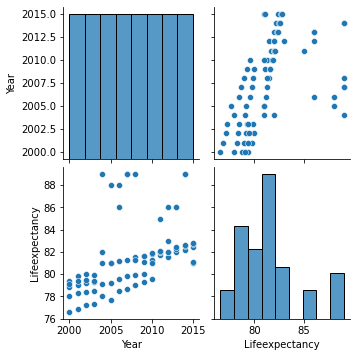

In [80]:
sns.pairplot(DF2)

In [81]:
corr_matrix = DF2.corr()
corr_matrix['Lifeexpectancy'].sort_values(ascending = False)

Lifeexpectancy    1.000000
Year              0.483638
Name: Lifeexpectancy, dtype: float64

In [82]:
X = DF2.iloc[:, :-1].values
y = DF2.iloc[:, -1].values

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 0.0 0.0 2015]
 [1.0 0.0 0.0 0.0 0.0 2014]
 [1.0 0.0 0.0 0.0 0.0 2013]
 [1.0 0.0 0.0 0.0 0.0 2012]
 [1.0 0.0 0.0 0.0 0.0 2011]
 [1.0 0.0 0.0 0.0 0.0 2010]
 [1.0 0.0 0.0 0.0 0.0 2009]
 [1.0 0.0 0.0 0.0 0.0 2008]
 [1.0 0.0 0.0 0.0 0.0 2007]
 [1.0 0.0 0.0 0.0 0.0 2006]
 [1.0 0.0 0.0 0.0 0.0 2005]
 [1.0 0.0 0.0 0.0 0.0 2004]
 [1.0 0.0 0.0 0.0 0.0 2003]
 [1.0 0.0 0.0 0.0 0.0 2002]
 [1.0 0.0 0.0 0.0 0.0 2001]
 [1.0 0.0 0.0 0.0 0.0 2000]
 [0.0 1.0 0.0 0.0 0.0 2015]
 [0.0 1.0 0.0 0.0 0.0 2014]
 [0.0 1.0 0.0 0.0 0.0 2013]
 [0.0 1.0 0.0 0.0 0.0 2012]
 [0.0 1.0 0.0 0.0 0.0 2011]
 [0.0 1.0 0.0 0.0 0.0 2010]
 [0.0 1.0 0.0 0.0 0.0 2009]
 [0.0 1.0 0.0 0.0 0.0 2008]
 [0.0 1.0 0.0 0.0 0.0 2007]
 [0.0 1.0 0.0 0.0 0.0 2006]
 [0.0 1.0 0.0 0.0 0.0 2005]
 [0.0 1.0 0.0 0.0 0.0 2004]
 [0.0 1.0 0.0 0.0 0.0 2003]
 [0.0 1.0 0.0 0.0 0.0 2002]
 [0.0 1.0 0.0 0.0 0.0 2001]
 [0.0 1.0 0.0 0.0 0.0 2000]
 [0.0 0.0 1.0 0.0 0.0 2015]
 [0.0 0.0 1.0 0.0 0.0 2014]
 [0.0 0.0 1.0 0.0 0.0 2013]
 [0.0 0.0 1.0 0.0 0.

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [85]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred = regressor.predict(X_test)

In [97]:
Prediction = regressor.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 2100]])
pred = Prediction.astype(int)
Prediction2 = regressor.predict([[0.0, 1.0, 0.0, 0.0, 0.0, 2100]])
pred2 = Prediction.astype(int)

print('In 2100 you will be', pred[0], 'years old in France and', pred2[0], 'years old in Spain according to a linear model (5 countries)')

In 2100 you will be 111 years old in France and 111 years old in Spain according to a linear model (5 countries)
